# **Time analysis**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import os

from utils import data_handling
from utils import plots
from utils import constants

## **Constants**

In [3]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
TIME_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'time_evaluation.csv')

## **Dataset**

In [4]:
df = pd.read_csv(TIME_RESULTS)
df.tail(n=5)

,date,model_name,source,target,score_type,score,epoch,parameters
298,2023-07-16 10:38:44.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.22511,41,{'valid-script-path': ['/docker/home/marianmt/...
299,2023-07-16 10:44:57.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.65720,51,{'valid-script-path': ['/docker/home/marianmt/...
300,2023-07-16 10:47:20.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.74517,51,{'valid-script-path': ['/docker/home/marianmt/...
301,2023-07-16 10:53:50.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.32900,61,{'valid-script-path': ['/docker/home/marianmt/...
302,2023-07-16 10:56:32.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.96839,61,{'valid-script-path': ['/docker/home/marianmt/...


**Add time column**

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
# Calculate duration between each score
df['duration'] = df[(df['score_type'] == 'sacrebleu_corpus_chrf')]['date'].diff().dt.total_seconds()

In [7]:
df[['model_name', 'epoch','date', 'duration']].tail(n=12)

,model_name,epoch,date,duration
291,gn_es_test_by_update_node21.npz,11,2023-07-16 10:09:37.682896,171713.0
292,gn_es_test_by_update_node21.npz,11,2023-07-16 10:12:18.682896,NaN
293,gn_es_test_by_update_node21.npz,21,2023-07-16 10:18:24.682896,527.0
294,gn_es_test_by_update_node21.npz,21,2023-07-16 10:20:39.682896,NaN
295,gn_es_test_by_update_node21.npz,31,2023-07-16 10:27:13.682896,529.0
296,gn_es_test_by_update_node21.npz,31,2023-07-16 10:29:56.682896,NaN
297,gn_es_test_by_update_node21.npz,41,2023-07-16 10:36:18.682896,545.0
298,gn_es_test_by_update_node21.npz,41,2023-07-16 10:38:44.682896,NaN
299,gn_es_test_by_update_node21.npz,51,2023-07-16 10:44:57.682896,519.0
300,gn_es_test_by_update_node21.npz,51,2023-07-16 10:47:20.682896,NaN


In [8]:
# Remove first time for each model (as it is being compared with an undefined value)
for idx, row in df.iterrows():
    if 'update' in row['model_name']:
        print(str(row['epoch'])[-2:], row['model_name'])
    if str(row['epoch'])[-2:] in ['10','11']:
        df.loc[idx, 'duration'] = np.nan

# Remove 0 and +inf values (outliers)
min_threshold = 5
max_threshold = 750
df['duration'] = df['duration'].apply(lambda x: x if x > min_threshold else np.nan)
df['duration'] = df['duration'].apply(lambda x: x if x < max_threshold else np.nan)

df[df['model_name'].str.contains('node21')].tail()

11 gn_es_test_by_update_node21.npz
11 gn_es_test_by_update_node21.npz
21 gn_es_test_by_update_node21.npz
21 gn_es_test_by_update_node21.npz
31 gn_es_test_by_update_node21.npz
31 gn_es_test_by_update_node21.npz
41 gn_es_test_by_update_node21.npz
41 gn_es_test_by_update_node21.npz
51 gn_es_test_by_update_node21.npz
51 gn_es_test_by_update_node21.npz
61 gn_es_test_by_update_node21.npz
61 gn_es_test_by_update_node21.npz


,date,model_name,source,target,score_type,score,epoch,parameters,duration
298,2023-07-16 10:38:44.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.22511,41,{'valid-script-path': ['/docker/home/marianmt/...,NaN
299,2023-07-16 10:44:57.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.65720,51,{'valid-script-path': ['/docker/home/marianmt/...,519.0
300,2023-07-16 10:47:20.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.74517,51,{'valid-script-path': ['/docker/home/marianmt/...,NaN
301,2023-07-16 10:53:50.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.32900,61,{'valid-script-path': ['/docker/home/marianmt/...,533.0
302,2023-07-16 10:56:32.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.96839,61,{'valid-script-path': ['/docker/home/marianmt/...,NaN


In [9]:
df[df['model_name'] == 'gn_es_test_by_update_node21.npz'].head()

,date,model_name,source,target,score_type,score,epoch,parameters,duration
291,2023-07-16 10:09:37.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.41640,11,{'valid-script-path': ['/docker/home/marianmt/...,NaN
292,2023-07-16 10:12:18.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.20096,11,{'valid-script-path': ['/docker/home/marianmt/...,NaN
293,2023-07-16 10:18:24.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.77090,21,{'valid-script-path': ['/docker/home/marianmt/...,527.0
294,2023-07-16 10:20:39.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.63263,21,{'valid-script-path': ['/docker/home/marianmt/...,NaN
295,2023-07-16 10:27:13.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.96930,31,{'valid-script-path': ['/docker/home/marianmt/...,529.0


In [10]:
df.groupby('model_name')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
model_name,,,,,,,,
gn_es_july_transformer_cpu.npz,1.0,468.982696,NaN,468.982696,468.982696,468.982696,468.982696,468.982696
gn_es_july_transformer_cpu_nodenode20_5_ram32.npz,9.0,339.290913,9.128400,326.747979,333.684416,340.144672,347.186945,353.160589
gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,9.0,385.147399,10.824592,368.666289,376.070998,385.337110,393.128967,400.497766
gn_es_july_transformer_cpu_nodenode21_fp16.npz,9.0,320.951094,7.824797,310.977171,316.235780,319.992482,322.671620,339.120970
gn_es_july_transformer_cpu_nodenode23.npz,16.0,303.515331,3.104215,298.622040,301.894946,302.438503,305.784137,308.268837
gn_es_july_transformer_cpu_nodenode23_2.npz,18.0,298.962907,5.618729,291.374117,294.015934,298.289615,303.840285,308.186843
gn_es_july_transformer_cpu_nodenode23_3.npz,18.0,298.225674,10.020006,277.896649,290.173931,301.644904,303.489797,308.790947
gn_es_july_transformer_cpu_nodenode23_4.npz,18.0,300.497223,5.536931,289.255318,298.796212,302.563815,304.203125,306.471489
gn_es_test_by_update_node21.npz,5.0,530.600000,9.528903,519.000000,527.000000,529.000000,533.000000,545.000000


f:\AlexisF\python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
f:\AlexisF\python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


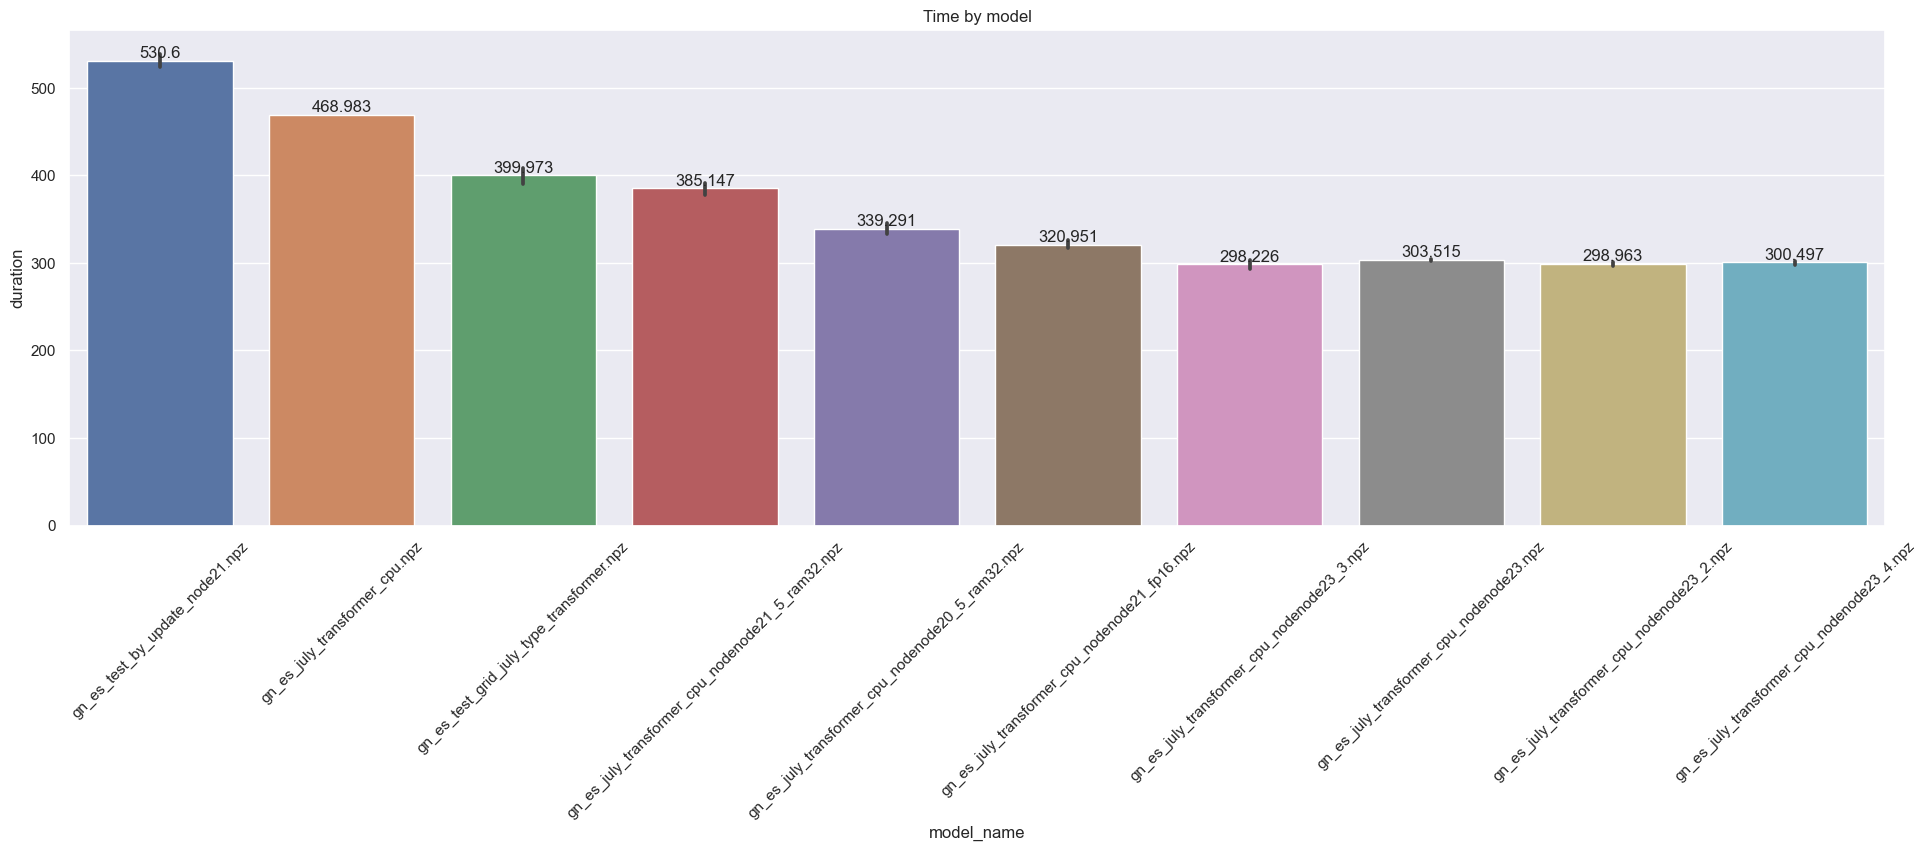

In [11]:
plots.plot_time_by_model(df, title='Time by model')

**Relevant points:**

- **Node 23** appears to be the fastest node. This makes sense as it has **3 GPUs**, while the other nodes have only **2**.
- Adding **fp16** changed **node21** time from **385s** average to **321s**.
- Tweaking configuration such as number of **CPUs**, **RAM** and **Tasks** does not seem to have a significant impact on the time.
- **Node 23** achieved the best time with **9 CPUs**, **60GB RAM** and **4 tasks**.


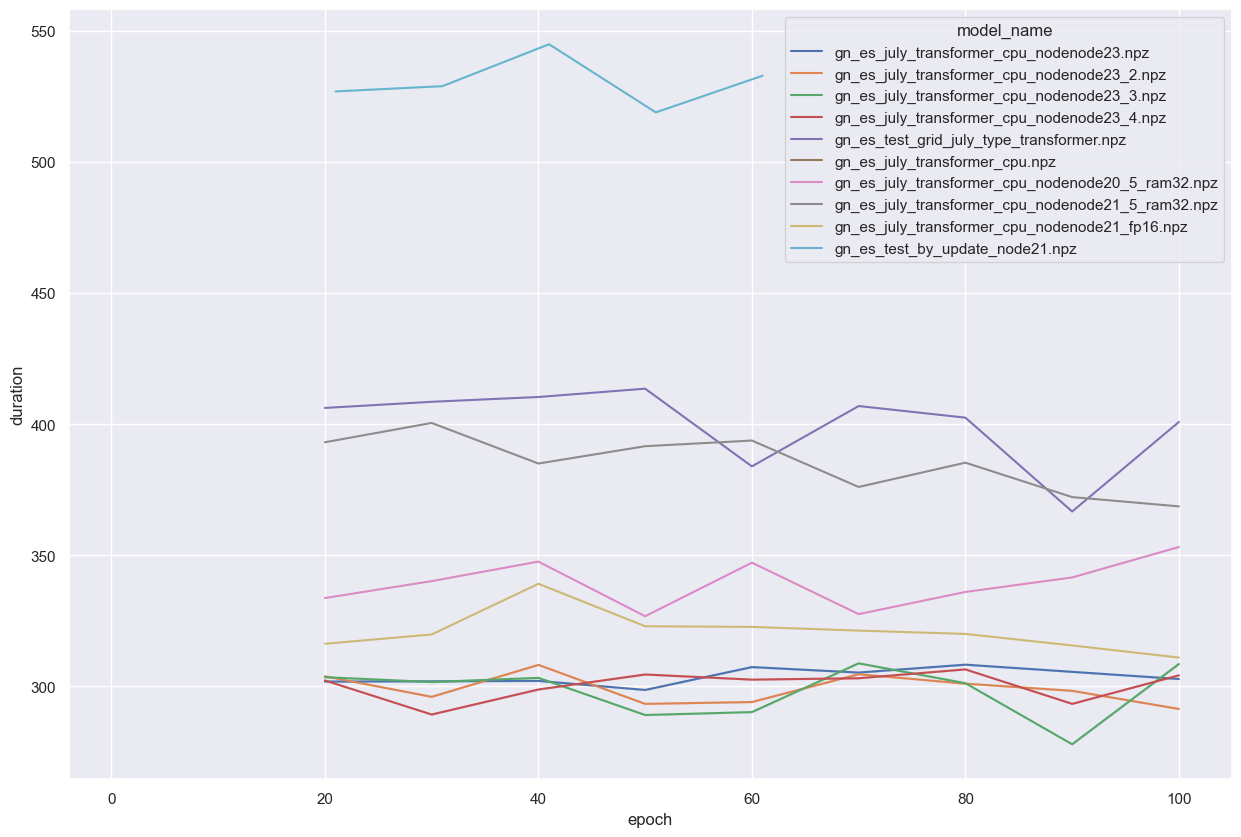

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='epoch', y='duration', hue='model_name', data=df[~df['duration'].isna()], ax=ax);

C:\Users\Alexis\AppData\Local\Temp\ipykernel_18348\4239511725.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, height=6, aspect=2);


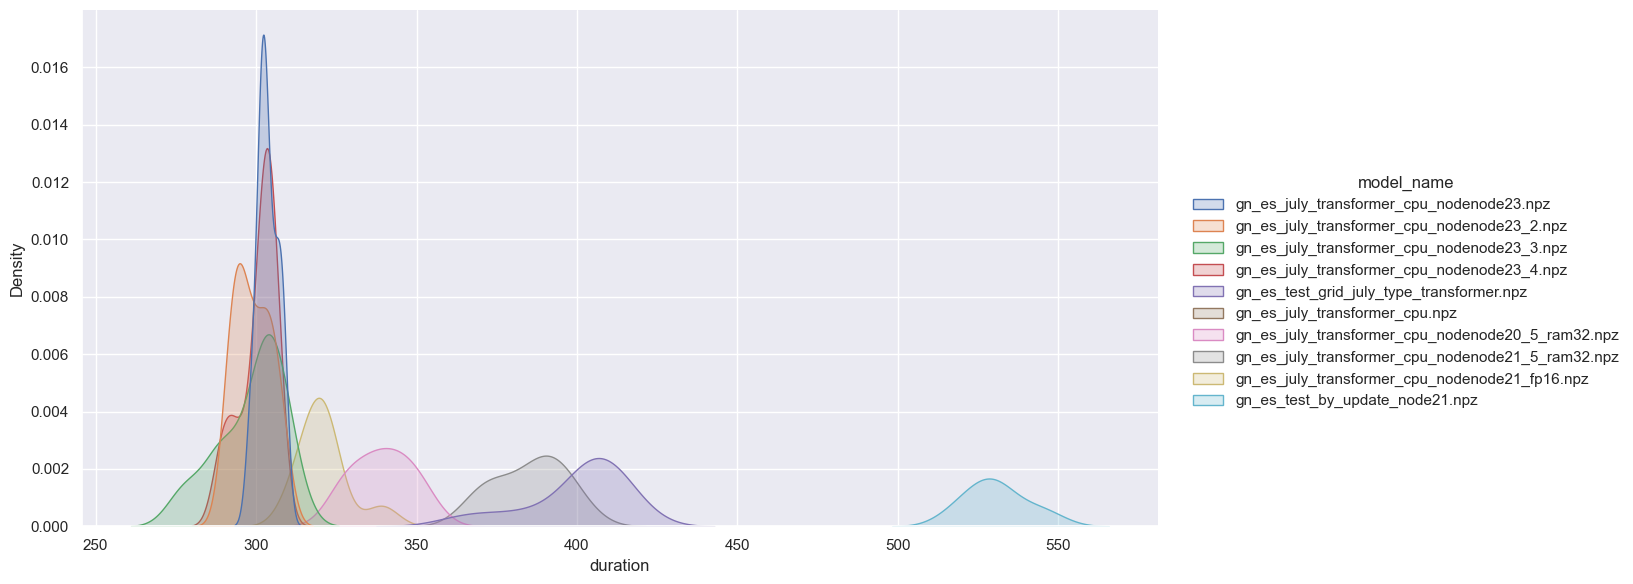

In [13]:
sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, height=6, aspect=2);

**Is time by update better than by epoch?**

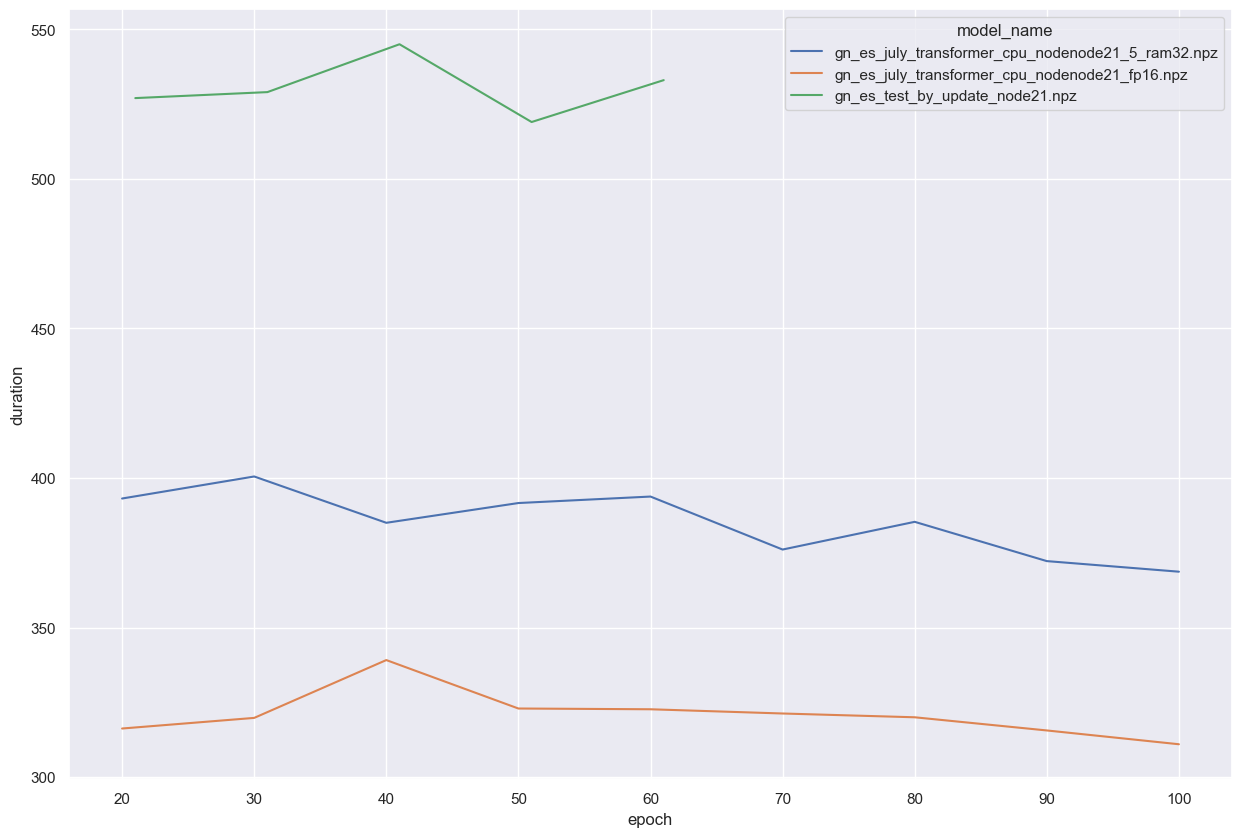

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='epoch', y='duration', hue='model_name', data=df[~df['duration'].isna() & df['model_name'].str.contains('node21', regex=False)], ax=ax);